In [82]:
import pandas as pd
import random #para datos random
import matplotlib.pyplot as plt #para los gráficos

In [83]:
df_data= [] # lista vacia para meter datos
dataset = [] #lista vacia que se rellena con diccionario
df = None  # para el DataFrame del punto 7

In [84]:
def set_hostnames(number_of_hosts):
    counter = 0

    for i in range(number_of_hosts):
        os_options = ['L'] * 40 + ['S'] * 30 + ['A'] * 20 + ['H'] * 10
        os = random.choice(os_options)

        env_options = ['D'] * 10 + ['I'] * 10 + ['T'] * 25 + ['S'] * 25 + ['P'] * 30
        environment = random.choice(env_options)

        country_options = ['NOR'] * 6 + ['FRA'] * 9 + ['ITA'] * 16 + ['ESP'] * 16 + ['DEU'] * 23 + ['IRL'] * 30
        country = random.choice(country_options)

        counter_str = str(counter).zfill(3)  # Asegura que siempre haya 3 dígitos
        hostname = os + environment + country + counter_str
        df_data.append(hostname)

        counter += 1

        if counter > 999:  # Si el contador supera 999, lo reinicia a 1
            counter = 1

In [85]:
def get_os(hostname):
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

In [86]:
def get_environment(hostname):
    if hostname[1] == 'D':  # 1 entre corchetes es la posición del caracter del parametro
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'

In [87]:
def get_country(hostname):
    if hostname[2:5]== 'NOR':# Coge las letras de la tercera a la quinta
        return 'Norway'
    elif hostname[2:5] == 'FRA':
        return 'France'
    elif hostname[2:5]== 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    else:
        return 'Unknown'

In [88]:
print(len(df_data))


0


In [89]:
def set_dataframe(count):
    global df #como estaba inicializada con un valor none hay que llamarlo con global

    set_hostnames(count) #invoca la primera funcion con el parametro count.

    for hostname in df_data:
      dataset.append({
          'hostname': hostname,
          'os': get_os(hostname),
          'environment': get_environment(hostname),
          'country': get_country(hostname),
          'node': int(hostname[-3:]) #lee los tres ultimos caracteres
        })

    df = pd.DataFrame(dataset)  # Genera el DataFrame

In [90]:
# Llamamos a la función set_dataframe
set_dataframe(1500)

# Mostramos el DataFrame
df


,hostname,os,environment,country,node
0,LSIRL000,Linux,Staging,Ireland,0
1,SPNOR001,Solaris,Production,Norway,1
2,LSFRA002,Linux,Staging,France,2
3,SSDEU003,Solaris,Staging,Germany,3
4,LTDEU004,Linux,Testing,Germany,4
...,...,...,...,...,...
1495,HPIRL496,HP-UX,Production,Ireland,496
1496,LPNOR497,Linux,Production,Norway,497
1497,SIIRL498,Solaris,Integration,Ireland,498
1498,STIRL499,Solaris,Testing,Ireland,499


In [91]:
# Guardo el DataFrame en un fichero CSV
df.to_csv('hosts.csv', header=True, index=False)

In [92]:
# Prueba de leer el archivo generado
hosts_df = pd.read_csv('hosts.csv')

# Visualizo el DataFrame
print(hosts_df)

      hostname       os  environment  country  node
0     LSIRL000    Linux      Staging  Ireland     0
1     SPNOR001  Solaris   Production   Norway     1
2     LSFRA002    Linux      Staging   France     2
3     SSDEU003  Solaris      Staging  Germany     3
4     LTDEU004    Linux      Testing  Germany     4
...        ...      ...          ...      ...   ...
1495  HPIRL496    HP-UX   Production  Ireland   496
1496  LPNOR497    Linux   Production   Norway   497
1497  SIIRL498  Solaris  Integration  Ireland   498
1498  STIRL499  Solaris      Testing  Ireland   499
1499  LIFRA500    Linux  Integration   France   500

[1500 rows x 5 columns]


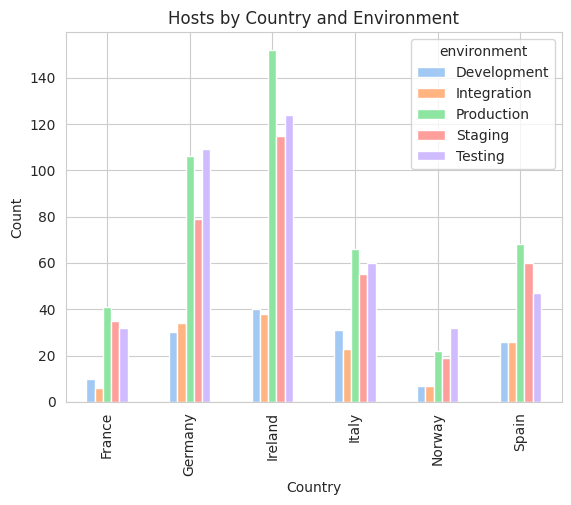

In [93]:
import seaborn as sns #para la paleta de colores

# Para el estilo y la paleta de colores
sns.set_style("whitegrid")
sns.set_palette("pastel")


grafico = df.groupby(['country', 'environment']).size().unstack()

grafico.plot(kind='bar') #gráfico de barras con los datos de la variable grafico


plt.xlabel('Country') #ejex
plt.ylabel('Count') #ejey
plt.title('Hosts by Country and Environment') #título

plt.show() #para verlo



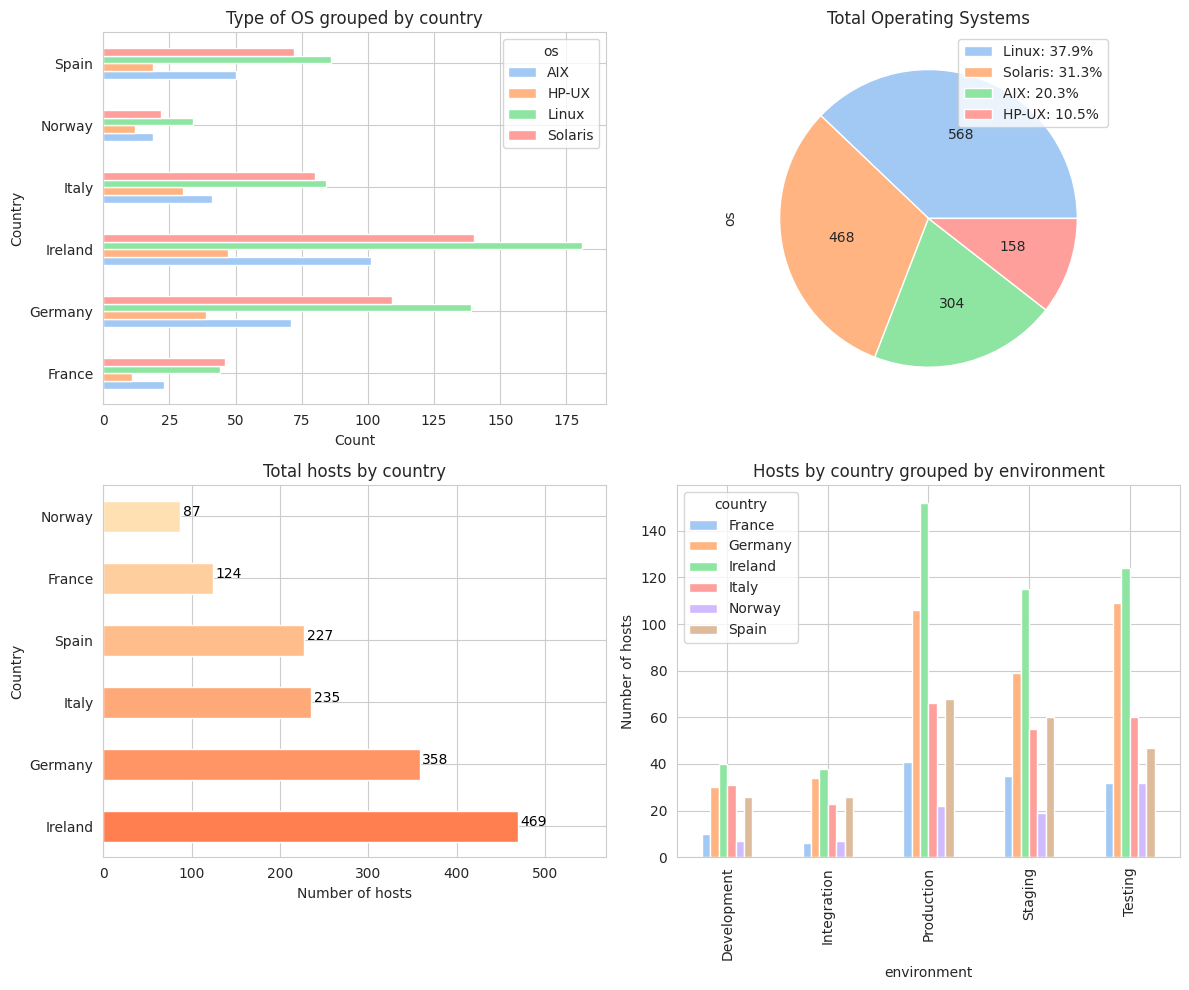

In [94]:
from matplotlib.colors import LinearSegmentedColormap  #para el color del gráfico 3

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #situa los gráficos

# Gráfico 1: Type of OS grouped by country

os_grafico = df.groupby(['country', 'os']).size().unstack()
os_grafico.plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Country')
axes[0, 0].set_title('Type of OS grouped by country')

# Gráfico 2: Total Operating Systems
os_counts = df['os'].value_counts()
os_counts.plot(kind='pie', ax=axes[0, 1], autopct=lambda p: f'{int(p * os_counts.sum() / 100)}', legend=True, labels = None) #lambda convierte el nº de % en número entero para que así aparezca en el gráfico y labels = None para quitar las etiquetas
axes[0, 1].legend(labels=[f'{os}: {count/len(df)*100:.1f}%' for os, count in os_counts.items()], loc='upper right') #para la leyenda
axes[0, 1].set_title('Total Operating Systems')


# Gráfico 3: Total hosts by country
hosts_counts = df['country'].value_counts()
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FF7F50','#FFB482','#FFE0B2'], N=len(hosts_counts))
grafico_hosts = hosts_counts.plot(kind='barh', ax=axes[1, 0], color=([cmap(i) for i in range(len(hosts_counts))]))
axes[1, 0].set_xlabel('Number of hosts')
axes[1, 0].set_ylabel('Country')
axes[1, 0].set_xlim(0, hosts_counts.max() + 100)
for i, v in enumerate(hosts_counts):
    axes[1, 0].text(v + 3, i, str(v), color='black')
axes[1, 0].set_title('Total hosts by country')

# Gráfico 4: Hosts by country grouped by environment
hosts_grafico = df.groupby(['environment', 'country']).size().unstack()
hosts_grafico.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('environment')
axes[1, 1].set_ylabel('Number of hosts')
axes[1, 1].set_title('Hosts by country grouped by environment')

# Ajusta los márgenes y espacios entre los gráficos
plt.tight_layout()
plt.show()